### Analysis of an E-commerce Dataset Part 1

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [39]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# data frame
df = pd.read_csv('The E-commerce Dataset.csv')
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [2]:
# number of null in each column
df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [3]:
# length of the data before cleansing
len (df)

20000

In [11]:
# data cleansing remove gender/rating/helpfulness
df_cleaned = df.dropna()
df_cleaned

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [12]:
# data cleansing convert "none" in review column into blank column
df_cleaned = df_cleaned[df_cleaned.review != "none"]
df_cleaned.loc[(df_cleaned['review'] == 'none')]

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city


In [13]:
# length of the data after cleansing
len(df_cleaned)

19916

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [19]:
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories
print ("Total number of unique users is ", df_cleaned.userId.nunique())
print ("Total number of unique reviews is ", df_cleaned.review.nunique())
print ("Total number of unique items is ", df_cleaned.item.nunique())
print ("Total number of unique categories is ", df_cleaned.category.nunique())

Total number of unique users is  8562
Total number of unique reviews is  19459
Total number of unique items is  89
Total number of unique categories is  9


In [24]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
df_cleaned.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [29]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
df_gender = df_cleaned.groupby(['gender'])['item'].count()
df_gender

gender
F     9793
M    10123
Name: item, dtype: int64

In [30]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
df_gender.describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [33]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
df_rating = df_cleaned.groupby(['item'])['rating'].count()
df_rating

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Name: rating, Length: 89, dtype: int64

In [34]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
df_rating.describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

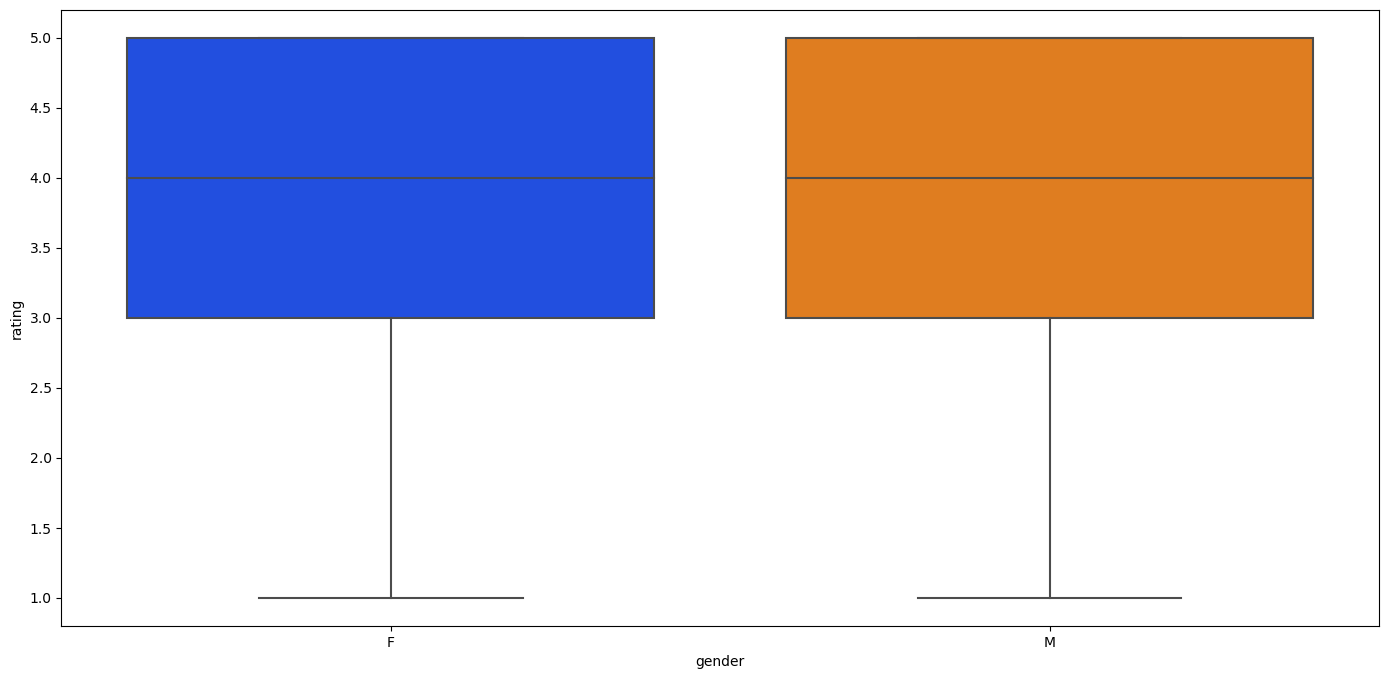

In [44]:
# gender and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'gender', y = 'rating', palette = 'bright', data = df_cleaned)

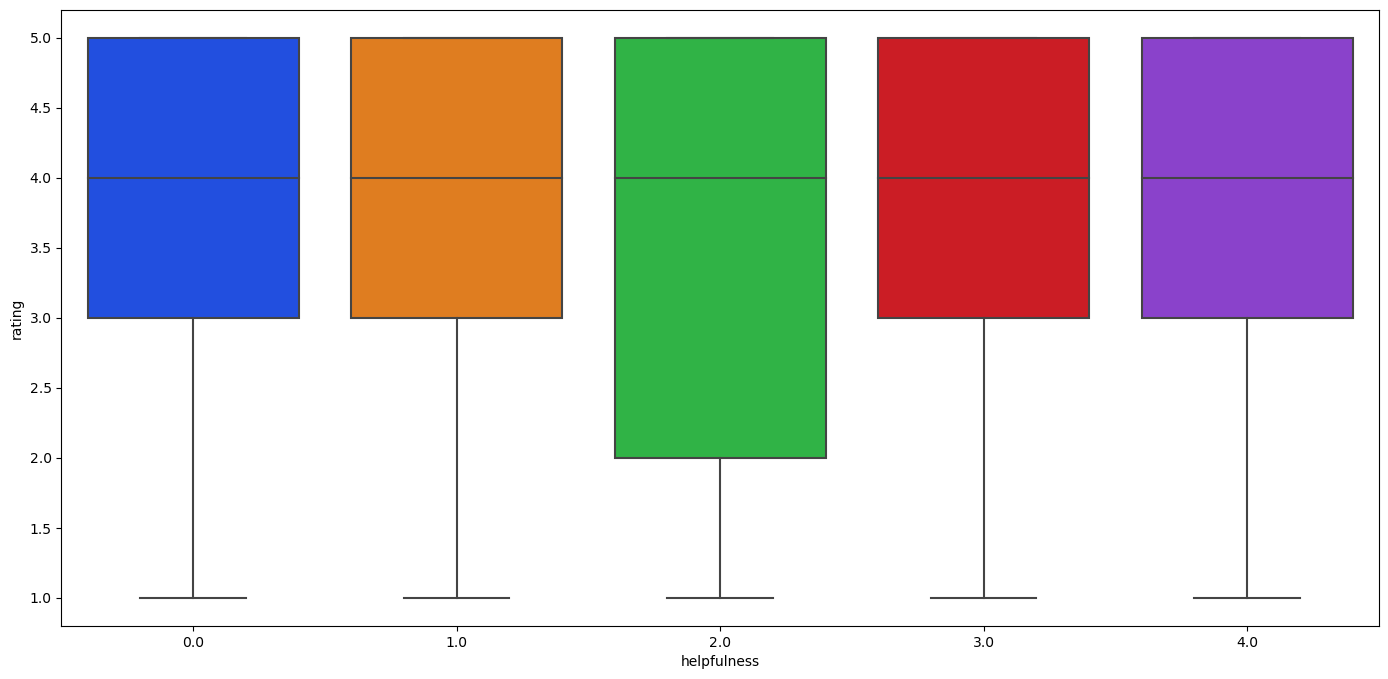

In [45]:
# helpfulness and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'helpfulness', y = 'rating', palette = 'bright', data = df_cleaned)

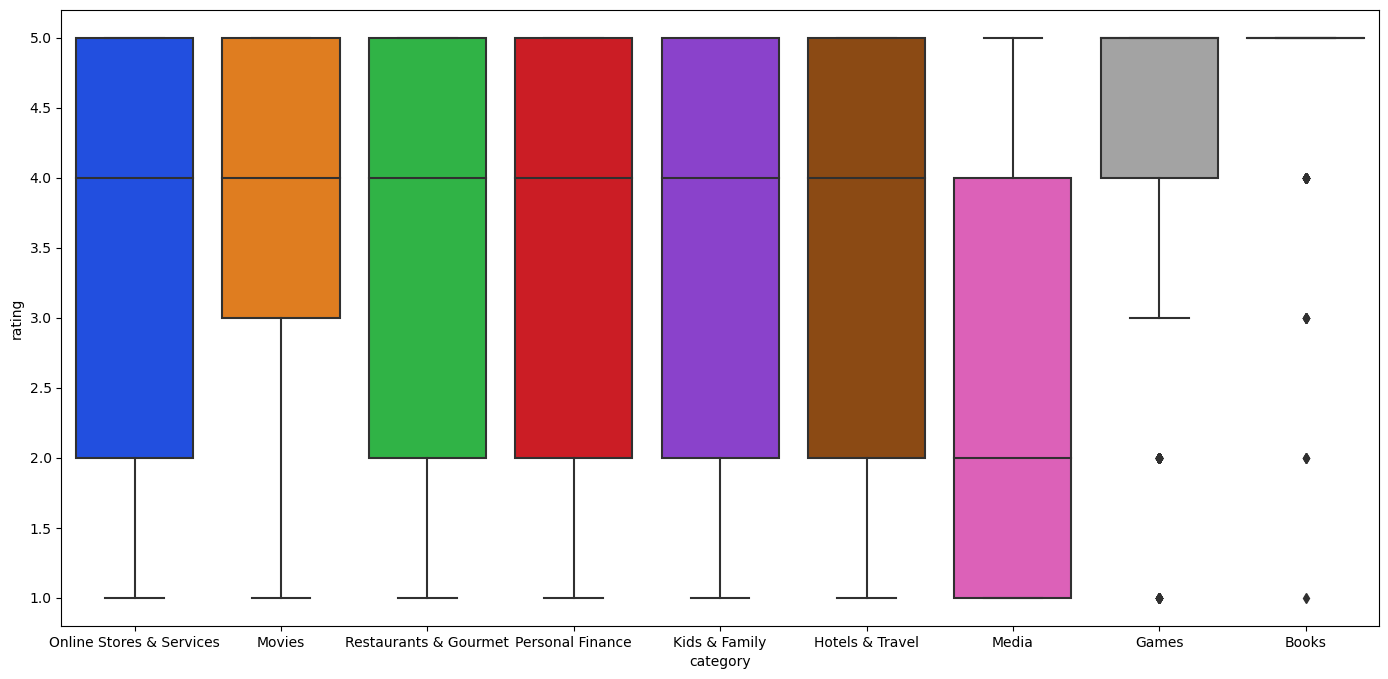

In [41]:
# category and rating correlation
plt.figure(figsize = (17,8))
ax = sns.boxplot(x = 'category', y = 'rating', palette = 'bright', data = df_cleaned)

### Analysis and Observation
* Overall, the rating distribution in terms of the majority category is quite similar
* Media category items tend to receive lower ratings compared to other categories
* While, game category items have smaller variance and their lowest ratings are only 4 which is the highest compared to other categories lowest ratings
* The impact of the category on ratings is also larger compared to genders on ratings

### Q4. Detect and remove outliers>

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):
* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [48]:
# the reviews of which the helpfulness is no more than 2
remove_outlier_df = df_cleaned.drop(df_cleaned.index[(df_cleaned['helpfulness'] <= 2)])
print('the number of user after removing outlier helpfulness', len(remove_outlier_df))

the number of user after removing outlier helpfulness 13643


In [49]:
# group users by their ids and count the number of their ratings
group_user_df = remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name = 'count')
print('the number of user after removing outlier helpfulness', len(group_user_df))

the number of user after removing outlier helpfulness 6535


In [50]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [51]:
# remove the ids of users who have rated no less than 7 times
userIds = group_user_df[group_user_df['count'] >= 7]['userId'].tolist()
print(len(userIds))

267


In [52]:
# filter users who have rated less than 7 times
remove_outlier_df = remove_outlier_df[remove_outlier_df['userId'].isin(userIds)]

In [53]:
print ('the length of data is', len (remove_outlier_df))

the length of data is 2741


In [54]:
# group items by their names and count the number of their ratings
group_item_df = remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name = 'count')
group_item_df.head()

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [55]:
# get the names of items that have recieved no less than 11 ratings
items = group_item_df[group_item_df['count'] >= 11]['item'].tolist()
print(len(items))

82


In [56]:
# filter items that have received less than 11 ratings
remove_outlier_df = remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2685

In [57]:
# export the processed data as csv file
remove_outlier_df.to_csv('ECommerce_data_clean.csv', index = False)

## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
# importing packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE, RFECV

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data frame
df = pd.read_csv("cleaned_ecommerce_dataset.csv")
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [3]:
# length of data frame
len(df)

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
# head
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [13]:
# null check
df.isnull().sum()

userId           0
timestamp        0
review           0
item             0
rating           0
helpfulness      0
gender           0
category         0
item_id          0
item_price       0
user_city        0
category_code    0
gender_code      0
review_code      0
dtype: int64

In [14]:
# convert categorical values into numerial values
ord_enc=OrdinalEncoder(dtype=int)

df["category_code"] = ord_enc.fit_transform(df[["category"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["review_code"] = ord_enc.fit_transform(df[["review"]])                                                                           
                                                                            
df[["category", "category_code", "review", "review_code", "gender", "gender_code"]].head(11)

,category,category_code,review,review_code,gender,gender_code
0,Restaurants & Gourmet,8,Not always McCrap,1618,M,1
1,Restaurants & Gourmet,8,I dropped the chalupa even before he told me to,1125,M,1
2,Restaurants & Gourmet,8,The Wonderful World of Wendy,2185,M,1
3,Movies,5,They actually did it,2243,M,1
4,Movies,5,Hey! Gimme some pie!,1033,M,1
5,Movies,5,Good for sci-fi,925,M,1
6,Movies,5,Scary? you bet!,1854,M,1
7,Media,4,Fox - the 4th basic channel,795,M,1
8,Movies,5,Amen!,262,M,1
9,Restaurants & Gourmet,8,mama mia!,2643,M,1


In [7]:
# dataframe head after conversion
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,category_code,gender_code,review_code
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,8,1,1618
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,8,1,1125
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,8,1,2185
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,5,1,2243
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,5,1,1033


In [8]:
# correlations between helpfulness/category/gender/review and rating
corr_helpfulness = df['helpfulness'].corr(df['rating']) 
corr_category = df['category_code'].corr(df['rating'])
corr_gender = df['gender_code'].corr(df['rating'])
corr_review = df['review_code'].corr(df['rating'])

print('corr_helpfulness: ', corr_helpfulness)
print('corr_category: ', corr_category)
print('corr_gender: ', corr_gender)
print('corr_review: ', corr_review)

corr_helpfulness:  -0.007523337726844546
corr_category:  -0.16315765340915656
corr_gender:  -0.03433661424208265
corr_review:  -0.036118386552122385


Based on the results, it can be concluded that:
* Rating and item category have the strongest negative correlation.
* On the other hand, the correlation between rating and helpfulness is the weakest. 
* In conclusion, since the resulted correlation values are low, rating is not significantly connected with the four attributes (helpfulness, category, gender, and review). 
* Therefore, the use of these features as input for rating prediction may not be totally accurate.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [9]:
# Case 1 - training data containing 10% of the entire data
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)
print('Case 1 train shape: ', train_case1.shape)
print('Case 1 test shape: ', test_case1.shape)

# Case 2 - training data containing 90% of the entire data
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)
print('Case 2 train shape: ', train_case2.shape)
print('Case 2 test shape: ', test_case2.shape)

Case 1 train shape:  (268, 14)
Case 1 test shape:  (2417, 14)
Case 2 train shape:  (2416, 14)
Case 2 test shape:  (269, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [10]:
# Model A - using the training/testing data in case 1 with two most correlated input features
reg_M1 = linear_model.LinearRegression()
X_train_M1 = train_case1[['review_code', 'category_code']]
y_train_M1 = train_case1['rating']

X_test_M1 = test_case1[['review_code', 'category_code']]
y_test_M1 = test_case1['rating']

reg_M1.fit(X_train_M1, y_train_M1)

# Model B - using the training/testing data in case 1 with two least correlated input features
reg_L1 = linear_model.LinearRegression()
X_train_L1 = train_case1[['gender_code', 'helpfulness']]
y_train_L1 = train_case1['rating']

X_test_L1 = test_case1[['gender_code', 'helpfulness']]
y_test_L1 = test_case1['rating']

reg_L1.fit(X_train_L1, y_train_L1)

# Model C - using the training/testing data in case 2 with two most correlated input features
reg_M2 = linear_model.LinearRegression()
X_train_M2 = train_case2[['review_code', 'category_code']]
y_train_M2 = train_case2['rating']

X_test_M2 = test_case2[['review_code', 'category_code']]
y_test_M2 = test_case2['rating']

reg_M2.fit(X_train_M2, y_train_M2)

# Model D - using the training/testing data in case 2 with two least correlated input features
reg_L2 = linear_model.LinearRegression()
X_train_L2 = train_case2[['gender_code', 'helpfulness']]
y_train_L2 = train_case2['rating']

X_test_L2 = test_case2[['gender_code', 'helpfulness']]
y_test_L2 = test_case2['rating']

reg_L2.fit(X_train_L2, y_train_L2)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [11]:
# Evaluate reg_M1
predicted_M1 = reg_M1.predict(X_test_M1)
mse_M1 = ((np.array(y_test_M1)-predicted_M1)**2).sum()/len(y_test_M1)
rmse_M1 = np.sqrt(mse_M1)
print("Case 1 - The results for the model A the most correlated features")
print("reg_M1 MSE:", mse_M1)
print("reg_M1 Root MSE:", rmse_M1)
print("")

# Evaluate reg_L1
predicted_L1 = reg_L1.predict(X_test_L1)
mse_L1 = ((np.array(y_test_L1)-predicted_L1)**2).sum()/len(y_test_L1)
rmse_L1 = np.sqrt(mse_L1)
print("Case 1 - The results for the model B the least correlated features")
print("reg_L1 MSE:", mse_L1)
print("reg_L1 Root MSE:", rmse_L1)
print("")

# Evaluate reg_M2
predicted_M2 = reg_M2.predict(X_test_M2)
mse_M2 = ((np.array(y_test_M2)-predicted_M2)**2).sum()/len(y_test_M2)
rmse_M2 = np.sqrt(mse_M2)
print("Case 2 - The results for the model C the most correlated features")
print("reg_M2 MSE:", mse_M2)
print("reg_M2 Root MSE:", rmse_M2)
print("")

# Evaluate reg_L2
predicted_L2 = reg_L2.predict(X_test_L2)
mse_L2 = ((np.array(y_test_L2)-predicted_L2)**2).sum()/len(y_test_L2)
rmse_L2 = np.sqrt(mse_L2)
print("Case 2 - The results for the model D the least correlated features")
print("reg_L2 MSE:", mse_L2)
print("reg_L2 Root MSE:", rmse_L2)

Case 1 - The results for the model A the most correlated features
reg_M1 MSE: 1.7690740179517055
reg_M1 Root MSE: 1.3300654186737229

Case 1 - The results for the model B the least correlated features
reg_L1 MSE: 1.8412549895856636
reg_L1 Root MSE: 1.356928513071217

Case 2 - The results for the model C the most correlated features
reg_M2 MSE: 1.7588975359805048
reg_M2 Root MSE: 1.3262343442923294

Case 2 - The results for the model D the least correlated features
reg_L2 MSE: 1.8109460127732366
reg_L2 Root MSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<BarContainer object of 4 artists>

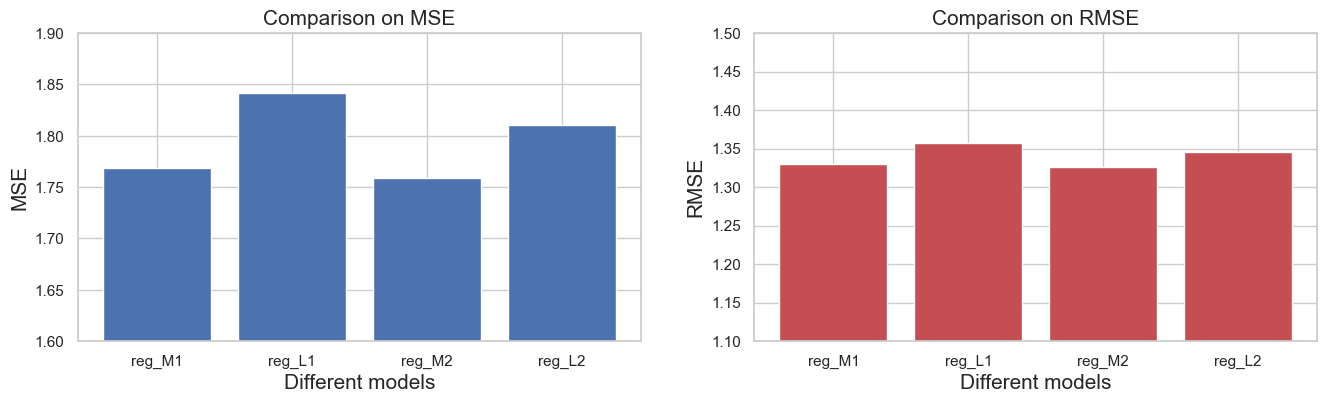

In [12]:
# dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [mse_M1, mse_L1, mse_M2, mse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])
rmse_df = pd.DataFrame({'rmse': [rmse_M1, rmse_L1, rmse_M2, rmse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1.6,1.9)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='b')
plt.subplot(1, 2, 2)
plt.ylim(1.1,1.5)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='r')

Based on the results, it can be concluded that:
## MSE
* reg_M2 < reg_M1 and reg_L2 < reg_L1 indicates that more training data will resulting better prediction
* reg_M1 < reg_L1 and reg_M2 < reg_L2 indicates that more correlated input features will generate better output

## RMSE
* reg_M2 < reg_M1 and reg_L2 < reg_L1 indicates that more training data will resulting better prediction
* reg_M1 < reg_L1 and reg_M2 < reg_L2 indicates that more correlated input features will generate better output

## Conclusion
* In conclusion, the little variations in performance with various settings show that the models are not well trained using these input features, according to the research. 
* Moreover, these input features are not very useful for rating prediction.

## Analysis of an E-commerce Dataset Part 3


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv("portfolio_3.csv")
df

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,3,M,Movies,9,111.00,5,1
2681,2445,30700,Good food!,Outback Steakhouse,3,M,Restaurants & Gourmet,50,25.00,5,1
2682,2445,61500,Great movie!,Fight Club,3,M,Movies,26,97.53,5,1
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,4,M,Games,79,27.00,5,1


In [3]:
# length of dataframe
len(df)

2685

In [4]:
# dataframe first 10 rows
df.head(10)

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0
5,4081,100399,Good for sci-fi,Matrix,3,M,Movies,40,24.51,4,0
6,4081,100399,Scary? you bet!,Blair Witch Project,3,M,Movies,12,44.00,4,1
7,4081,101899,Fox - the 4th basic channel,FOX,4,M,Media,25,80.00,4,1
8,4081,112099,Amen!,Dogma,3,M,Movies,22,87.59,4,1
9,4081,122899,mama mia!,Olive Garden,3,M,Restaurants & Gourmet,49,32.00,4,1


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


In [6]:
# null values check
df.isnull().sum()

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64

In [7]:
# convert categorical values into numerial values
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
df[["review", "item", "gender", "category"]] = ord_enc.fit_transform(df[["review", "item", "gender", "category"]])
df.head(10)

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,1618,37,3,1,8,41,30.74,4,1
1,4081,72000,1125,67,4,1,8,74,108.30,4,0
2,4081,72000,2185,77,4,1,8,84,69.00,4,1
3,4081,100399,2243,61,3,1,5,68,143.11,4,1
4,4081,100399,1033,5,3,1,5,6,117.89,4,0
5,4081,100399,925,36,3,1,5,40,24.51,4,0
6,4081,100399,1854,11,3,1,5,12,44.00,4,1
7,4081,101899,795,23,4,1,4,25,80.00,4,1
8,4081,112099,262,21,3,1,5,22,87.59,4,1
9,4081,122899,2643,44,3,1,8,49,32.00,4,1


In [8]:
# correlation matrix
df.corr()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
userId,1.000000,-0.069176,0.007139,-0.005513,-0.166136,-0.058324,-0.041362,-0.005549,0.024576,-0.030031,0.066444
timestamp,-0.069176,1.000000,0.007029,-0.003543,0.014179,-0.003367,0.015009,-0.004452,0.010979,-0.014934,-0.009739
review,0.007139,0.007029,1.000000,0.163090,-0.028259,-0.037884,0.001970,0.163544,-0.041421,0.045626,-0.041756
item,-0.005513,-0.003543,0.163090,1.000000,-0.020433,0.001925,-0.045988,0.999765,-0.049885,-0.005220,0.057793
helpfulness,-0.166136,0.014179,-0.028259,-0.020433,1.000000,0.075947,-0.013408,-0.019882,0.004112,0.012086,-0.010622
gender,-0.058324,-0.003367,-0.037884,0.001925,0.075947,1.000000,0.022549,0.002370,-0.040596,-0.065638,-0.022169
category,-0.041362,0.015009,0.001970,-0.045988,-0.013408,0.022549,1.000000,-0.045268,-0.115571,0.008017,-0.142479
item_id,-0.005549,-0.004452,0.163544,0.999765,-0.019882,0.002370,-0.045268,1.000000,-0.054450,-0.005576,0.057107
item_price,0.024576,0.010979,-0.041421,-0.049885,0.004112,-0.040596,-0.115571,-0.054450,1.000000,-0.023427,0.026062
user_city,-0.030031,-0.014934,0.045626,-0.005220,0.012086,-0.065638,0.008017,-0.005576,-0.023427,1.000000,-0.034866


### Analysis
Based on the correlation coefficient, it can be seen that feedback has weak correlation with all the rest features

## Dataset split

In [9]:
from sklearn.model_selection import train_test_split

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (2148, 10)
y_train shape:  (2148,)
X_test shape:  (537, 10)
y_test.shape:  (537,)


In [10]:
X_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

## Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression

# training model with all features
lr = LogisticRegression().fit(X_train, y_train)

# Evaluating trained model on training and test set
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

Acc on training set:  0.6391992551210428
Acc on test set:  0.638733705772812


### Analysis

- The results (around 63%) showed that the model is poor
- Next step is to tune the model by using RFE to select most important features
- Then train the model with the selected important features

In [17]:
from sklearn.feature_selection import RFE
rfe = RFE(lr)
rfe_model = rfe.fit(X_train, y_train)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  5
Selected features:  [False False False  True  True  True  True  True False False]
Features ranking:  [5 6 4 1 1 1 1 1 3 2]


#### Analysis

- The results from the RFE show that userId, movieId and timestamp is the most important features
- Try to re-trian the model with three most important features 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['userId', 'timestamp', 'review', 'item', 'rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)


# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

# training model with the top-3 features
lr = LogisticRegression().fit(X_train, y_train)

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

### Analysis

- Based on the results, it can be seen that the accuracy achieved by the logistic regression is poor
- Thus, the next step is KNN testing

### More testing using KNN model

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)

In [ ]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define search space for parameters
parameter_grid = {'n_neighbors': range(5, 80)}

X = df.drop(['rating'], axis=1)
y = df['rating']

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Based on the results, it can be seen that:
* The accuracy achieved by KNN is around 64%. Altough it is better than the logistic regression but it is still quite low thus the model is considered as poor. It is actually predictable because the resulted correlation coefficient is very low.